In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
 

In [3]:
df = pd.read_csv('../data/spotify_dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## 📊 Statistical Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
df.drop_duplicates(subset='track_id', inplace=True)


In [7]:
summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'duplicate count': df.duplicated().sum(),
    'unique values': df.nunique()
})
summary

,dtypes,null count,duplicate count,unique values
Unnamed: 0,int64,0,0,89741
track_id,object,0,0,89741
artists,object,1,0,31437
album_name,object,1,0,46589
track_name,object,1,0,73608
popularity,int64,0,0,101
duration_ms,int64,0,0,50697
explicit,bool,0,0,2
danceability,float64,0,0,1174
energy,float64,0,0,2083


In [8]:
df.dropna().head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
df.drop(columns='id', inplace=True)

In [10]:
df[df['track_name'] == 'bad guy'].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
14928,1IWuiJ7X8zaPmK9NiL0lH6,Twinkle Twinkle Little Rock Star,Lullaby Versions of Billie Eilish,bad guy,28,266571,False,0.725,0.0524,7,-30.335,0,0.102,0.979,0.935,0.0943,0.185,140.028,5,children
31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84,194087,False,0.701,0.4250,7,-10.965,1,0.375,0.328,0.130,0.1000,0.562,135.128,4,electro
31033,5KJaEu2ZMIt9FMvofqUgmg,Billie Eilish,Отново на училище,bad guy,1,194087,False,0.701,0.4250,7,-10.965,1,0.375,0.328,0.130,0.1000,0.562,135.128,4,electro
31040,154lbtHSyyOt0ao2QwbE4n,Billie Eilish,Girls Night,bad guy,1,194087,False,0.701,0.4250,7,-10.965,1,0.375,0.328,0.130,0.1000,0.562,135.128,4,electro
31044,2yNKDG4FgwzQuL0JUEOunR,Billie Eilish,Herbststimmung,bad guy,1,194087,False,0.701,0.4250,7,-10.965,1,0.375,0.328,0.130,0.1000,0.562,135.128,4,electro


In [11]:
df_max_popularity_per_album = df.loc[df.groupby(['track_name', 'artists'])['popularity'].idxmax()]

# Paso 2: Si hay múltiples registros con la misma popularidad para una combinación única de track_name y artista, conservar el álbum con la mayor popularidad
df = df_max_popularity_per_album.loc[df_max_popularity_per_album.groupby(['track_name', 'artists'])['popularity'].idxmax()]


In [18]:
df[df['track_name'] == 'bad guy'].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84,194087,False,0.701,0.4250,7,-10.965,1,0.375,0.328,0.130,0.1000,0.562,135.128,4,Electronic/Dance
14928,1IWuiJ7X8zaPmK9NiL0lH6,Twinkle Twinkle Little Rock Star,Lullaby Versions of Billie Eilish,bad guy,28,266571,False,0.725,0.0524,7,-30.335,0,0.102,0.979,0.935,0.0943,0.185,140.028,5,Children's Music


In [19]:
df.shape

(81343, 20)

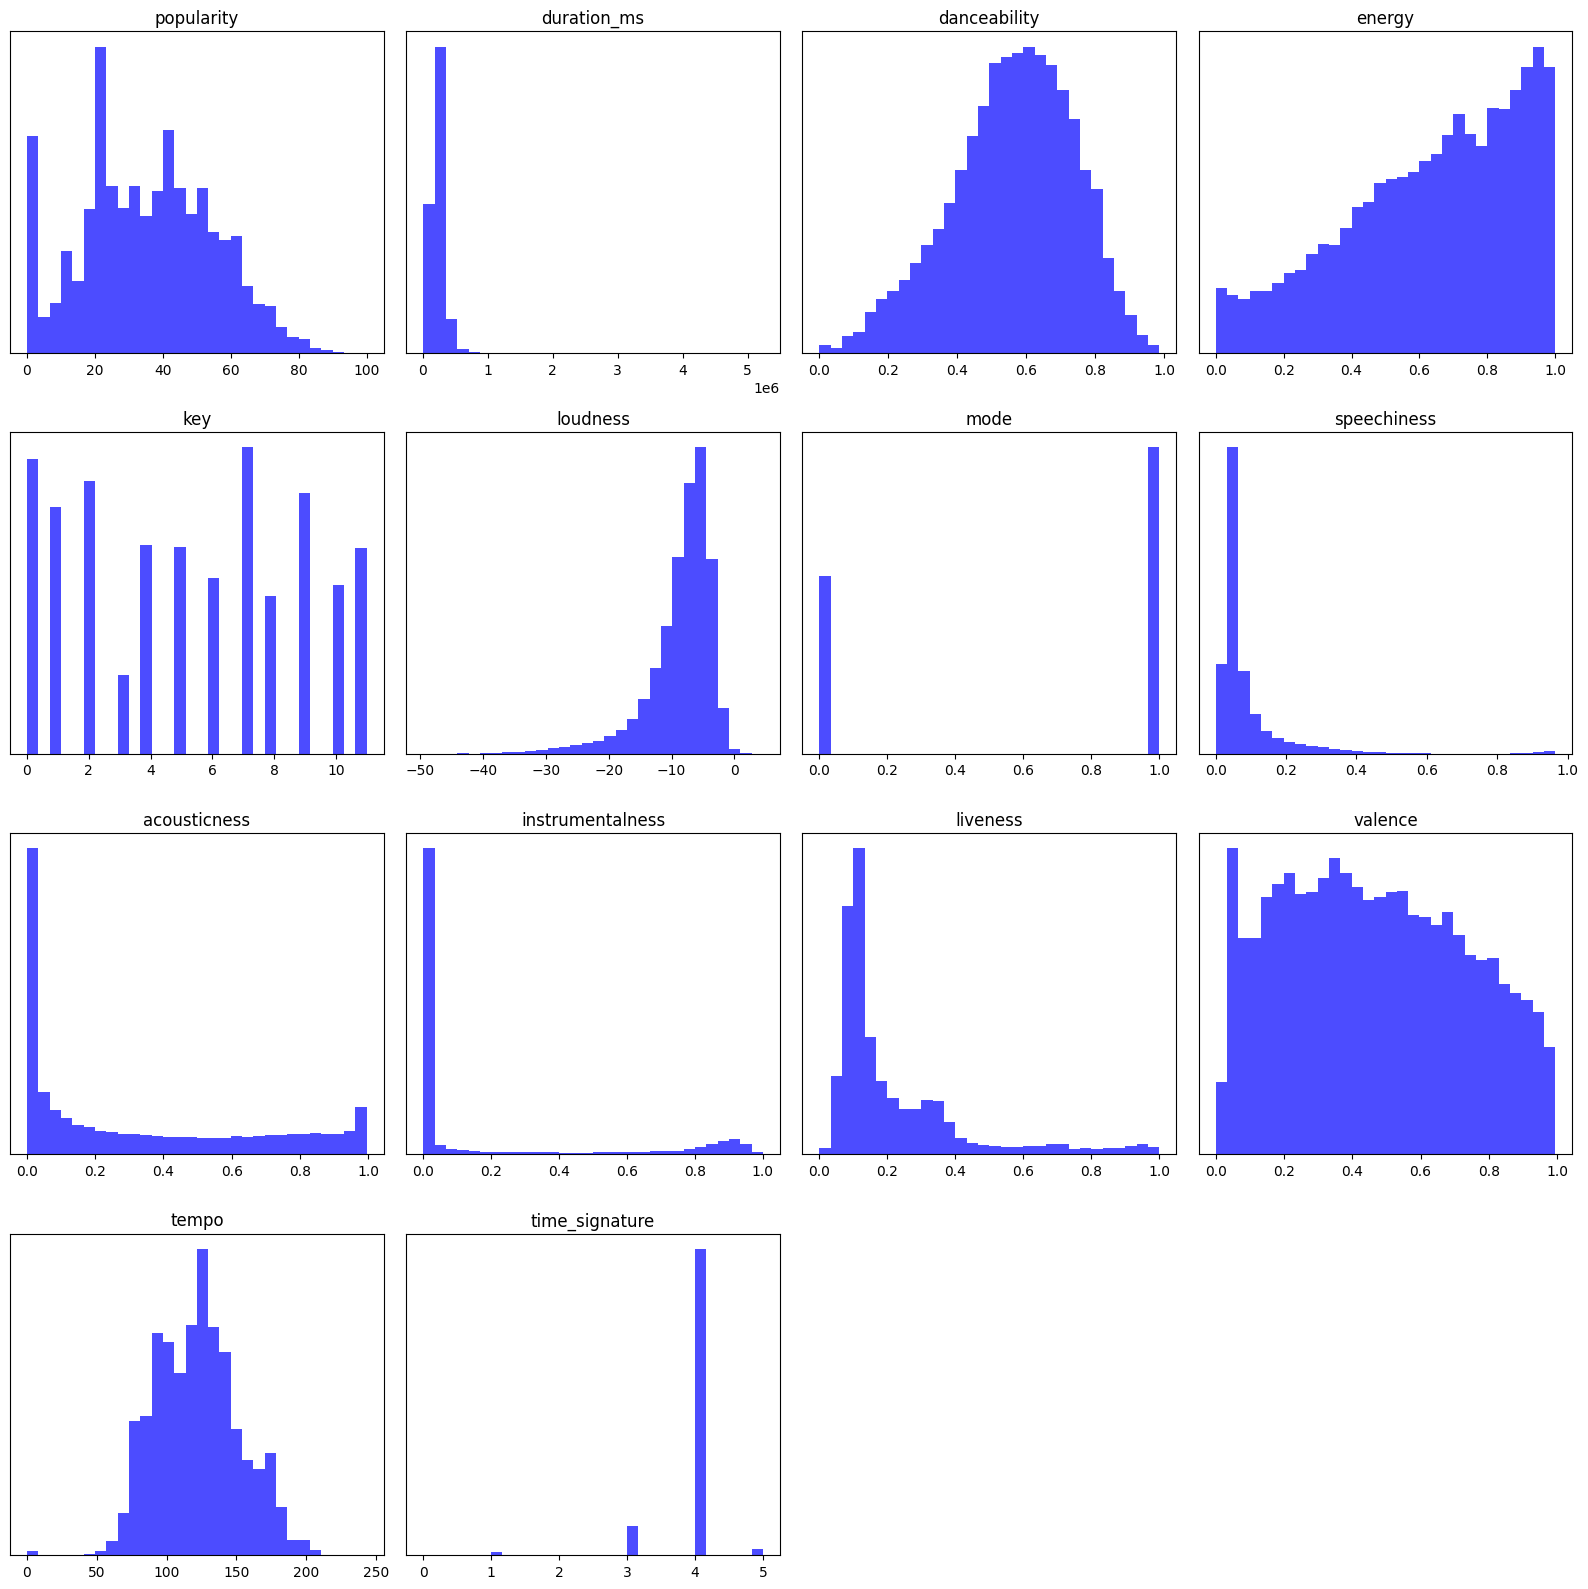

In [12]:
numerical = df.select_dtypes('number')

n_cols = 4  
n_rows = ceil(numerical.shape[1] / n_cols)  
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical.columns):
    ax = axes[i]
    ax.hist(numerical[column], bins=30, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_yticks([])  


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


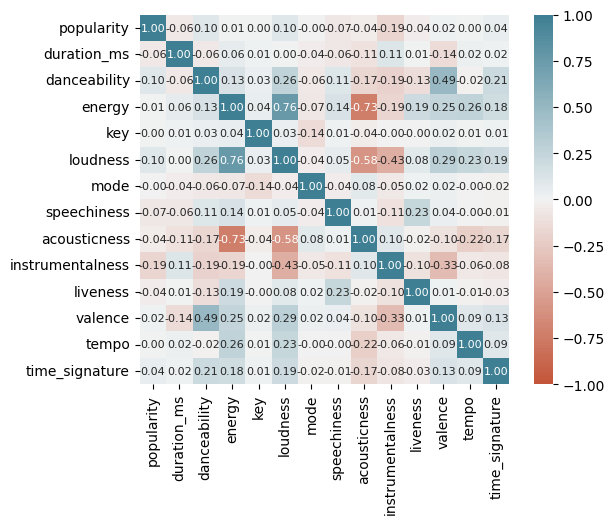

In [13]:
correlation = numerical.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

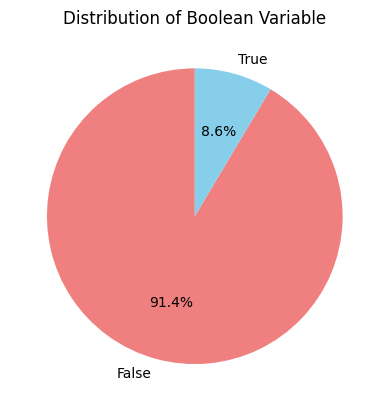

In [14]:
counts = df['explicit'].value_counts()


plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribution of Boolean Variable')
plt.show()

In [15]:
print(df['track_genre'].unique())

['french' 'rockabilly' 'kids' 'sleep' 'power-pop' 'anime' 'romance'
 'piano' 'german' 'classical' 'show-tunes' 'british' 'ska' 'acoustic'
 'trip-hop' 'idm' 'blues' 'ambient' 'hardstyle' 'electronic' 'emo'
 'alternative' 'latin' 'punk-rock' 'j-idol' 'garage' 'study' 'country'
 'club' 'comedy' 'detroit-techno' 'chill' 'j-pop' 'happy' 'folk'
 'honky-tonk' 'opera' 'guitar' 'goth' 'disney' 'new-age' 'jazz'
 'bluegrass' 'mandopop' 'rock' 'rock-n-roll' 'children' 'death-metal'
 'synth-pop' 'reggae' 'disco' 'industrial' 'dub' 'grindcore' 'dancehall'
 'funk' 'spanish' 'salsa' 'iranian' 'metalcore' 'alt-rock' 'hip-hop'
 'soul' 'k-pop' 'metal' 'techno' 'house' 'black-metal' 'chicago-house'
 'trance' 'psych-rock' 'pagode' 'j-dance' 'brazil' 'grunge' 'dance'
 'world-music' 'hardcore' 'gospel' 'sertanejo' 'turkish' 'punk' 'party'
 'groove' 'forro' 'afrobeat' 'heavy-metal' 'edm' 'indie' 'latino'
 'breakbeat' 'hard-rock' 'j-rock' 'singer-songwriter' 'cantopop'
 'drum-and-bass' 'minimal-techno' 'indie-

In [16]:
genre_map = {
    'Rock': ['ska','alt-rock', 'hard-rock', 'punk-rock', 'psych-rock', 'rock', 'rock-n-roll', 'grunge', 'goth', 'rockabilly', 'guitar','garage','j-rock'],
    'Pop': ['pop', 'indie-pop', 'synth-pop', 'j-pop', 'k-pop', 'cantopop', 'mandopop', 'power-pop', 'pop-film'],
    'Electronic/Dance': ['hardstyle','disco','edm', 'house', 'techno', 'trance', 'dubstep', 'electro', 'chicago-house', 'deep-house', 'detroit-techno', 'progressive-house', 'club', 'dance', 'dancehall', 'drum-and-bass', 'idm', 'breakbeat', 'electronic','minimal-techno'],
    'Hip-Hop/Rap': ['hip-hop','trip-hop'],
    'Metal': ['metal', 'black-metal', 'death-metal', 'heavy-metal', 'metalcore', 'hardcore', 'grindcore'],
    'Jazz/Blues': ['jazz', 'blues', 'bluegrass','groove'],
    'Classical/Opera': ['classical', 'opera', 'piano','happy','romance','sad', 'comedy'],
    'Country/Folk': ['country', 'folk', 'honky-tonk'],
    'World Music': ['afrobeat', 'indian', 'iranian', 'j-dance', 'j-idol','brazil', 'french', 'german', 'malay', 'swedish', 'turkish', 'world-music','spanish','british'],
    'Latin': ['salsa', 'samba', 'pagode', 'mpb', 'forro', 'sertanejo', 'tango', 'latin', 'latino'],
    'Reggae': ['reggae', 'reggaeton', 'dub'],
    'Soundtrack/Film': ['anime', 'disney', 'show-tunes'],
    "Children's Music": ['children', 'kids'],
    'Ambient/New Age': ['ambient', 'chill', 'new-age', 'sleep', 'study'],
    'Punk': ['punk', 'emo'],
    'Soul/R&B': ['soul', 'r-n-b', 'funk', 'gospel'],
    'Alternative/Indie': ['alternative', 'indie','acoustic'],
    'Other': [ 'industrial', 'party','singer-songwriter']
}

def map_genre(genre):
    for key, values in genre_map.items():
        if genre in values:
            return key
    return 'Other'

df['track_genre'] = df['track_genre'].apply(map_genre)


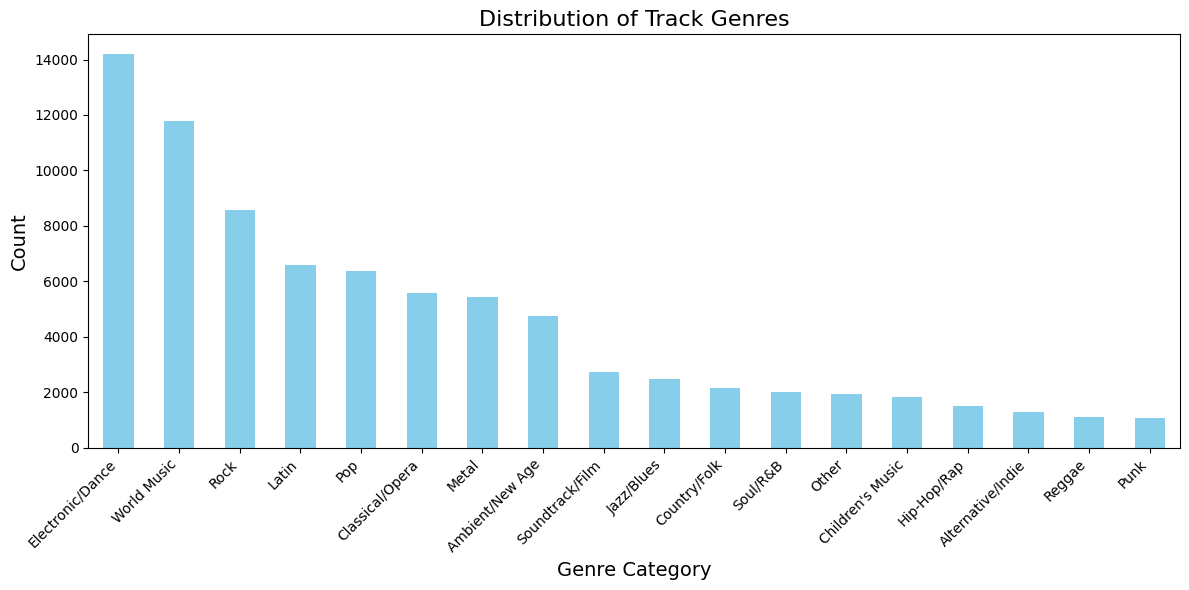

In [17]:

plt.figure(figsize=(12, 6))
df['track_genre'].value_counts().plot(kind='bar', color='skyblue')


plt.title('Distribution of Track Genres', fontsize=16)
plt.xlabel('Genre Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()